In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [34]:
start = '2004-01-01'
end = '2024-12-21'
stock = 'IBM'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [35]:
data.reset_index(inplace=True)

In [36]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,88.776291,88.957932,87.189293,87.523903,48.429558,5572879
1,2004-01-05,87.954109,88.996178,87.954109,88.957932,49.223045,5519010
2,2004-01-06,88.145317,89.091782,88.087952,88.967499,49.228336,4581480
3,2004-01-07,89.043976,89.273422,88.403442,88.699806,49.080227,5154270
4,2004-01-08,89.110901,89.110901,87.982796,88.948372,49.217758,6464071
...,...,...,...,...,...,...,...
5174,2024-07-25,186.800003,196.259995,185.300003,191.979996,191.979996,9532800
5175,2024-07-26,190.509995,193.570007,189.619995,191.750000,191.750000,4294900
5176,2024-07-29,193.179993,193.289993,189.179993,191.500000,191.500000,3336800
5177,2024-07-30,191.479996,192.770004,189.089996,191.039993,191.039993,3063300


In [37]:
ma_100_days = data.Close.rolling(100).mean()

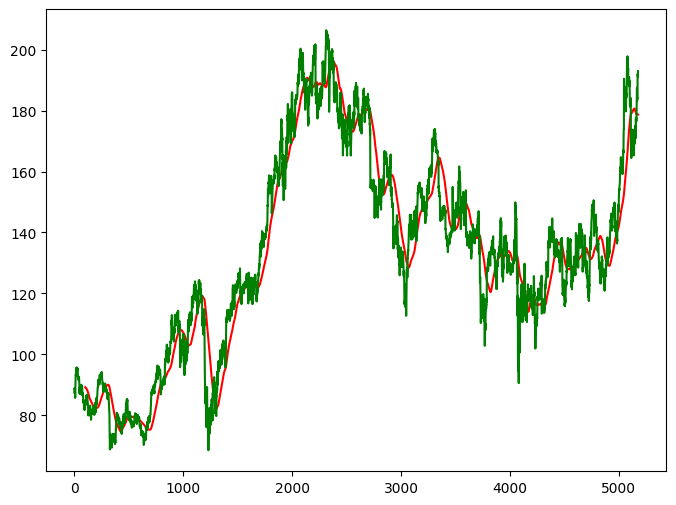

In [38]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [39]:
ma_200_days = data.Close.rolling(200).mean()

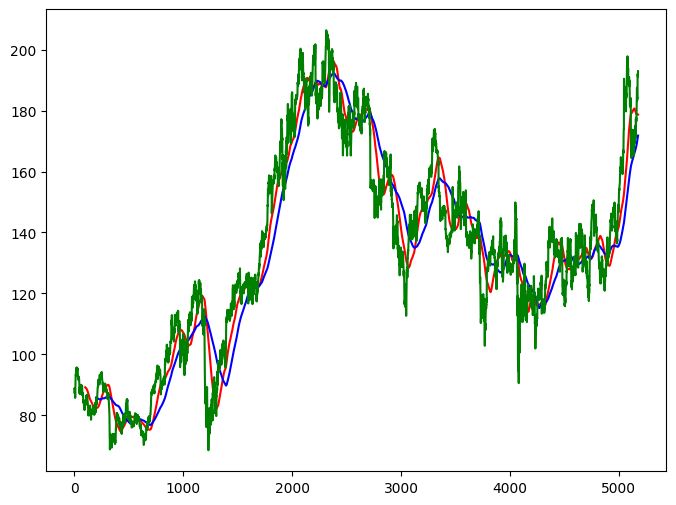

In [40]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [41]:
data.dropna(inplace=True)

In [42]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [43]:
data_train.shape[0]

4143

In [44]:
data_test.shape[0]

1036

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [47]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [48]:
x, y = np.array(x), np.array(y)

In [49]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [50]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 44s 302ms/step - loss: 0.0785
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 301ms/step - loss: 0.0092
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - loss: 0.0088
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - loss: 0.0083
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 37s 289ms/step - loss: 0.0070
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 300ms/step - loss: 0.0064
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - loss: 0.0056
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - loss: 0.0051
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0047
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 38s 301ms/step - loss: 0.0046
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - loss: 0.0047
Epoch 12/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - loss: 0.0046
Epoch 13/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 0.0042
Epoch 14/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - loss: 0.0036
Epoch 15/50
127

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [56]:
pas_100_days = data_train.tail(100)

In [57]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [58]:
data_test_scale  =  scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [60]:
y_predict = model.predict(x)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step


In [61]:
scale =1/scaler.scale_

In [62]:
y_predict = y_predict*scale

In [63]:
y = y*scale

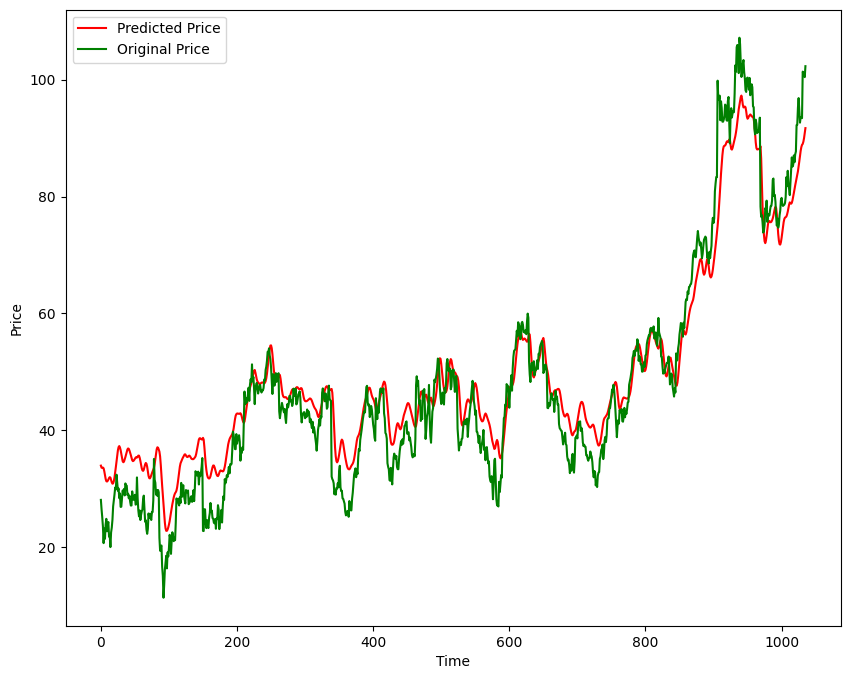

In [64]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [65]:
model.save('Stock Predictions Model.keras')